# Version Check

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))  

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


# Load Libraries

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import csv
import os
import re
from sklearn.utils.class_weight import compute_class_weight
import statistics
from cycler import cycler
from itertools import product

In [3]:
pre_datasets = pandas.read_csv('datasets_T.csv', low_memory=False)
headers = pre_datasets.iloc[0]
DATASETS  = pandas.DataFrame(pre_datasets.values[1:], columns=headers)
DATASETS = DATASETS.dropna(axis='columns', how='all')
CLASSIFICATION = DATASETS['STATUS']

In [4]:
encoder = LabelEncoder()
DATASETS['ID_REF'] = encoder.fit_transform(DATASETS['ID_REF'])
# CLASSIFICATION = pandas.Series(encoder.fit_transform(CLASSIFICATION),
#     index=CLASSIFICATION.index, name=CLASSIFICATION.name)
# print(CLASSIFICATION)
x_train, x_validate, y_train, y_validate = train_test_split(
DATASETS.drop(labels='STATUS', axis=1), CLASSIFICATION, test_size=5, random_state=8) #.26,8
print(y_validate)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_validate = sc.transform(x_validate)

print("training dataset count:", len(y_train))
print("test dataset count:", len(y_validate))
print("total dataset count:",len(y_train)+len(y_validate))
print()
print(type(y_train))
print(type(x_train))
counterCD=0
counterUC=0
counterH=0
for i in y_train:
    if i == "Crohn's disease": counterCD+=1
    elif i == 'ulcerative colitis': counterUC+=1
    elif i == 'Healthy control': counterH+=1
print(counterCD,counterUC,counterH)
#note to self 1: nth y_train diagnose label's data is equal to nth x_train array, iterate linearly with for loop here
#note to self 2: the data format is -> y is label TEXT    x is list of float

22    ulcerative colitis
0        Healthy control
18       Crohn's disease
27    ulcerative colitis
1        Healthy control
Name: STATUS, dtype: object
training dataset count: 30
test dataset count: 5
total dataset count: 35

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
12 13 5


In [5]:
# print('='*40) ############### main part ##############
xtempUC = []
xtempCD = []
xtempHC = []

ytempUC = pandas.Series(dtype='float64')
ytempCD = pandas.Series(dtype='float64')
ytempHC = pandas.Series(dtype='float64')

iter=0
for i in y_train:
    if i == 'ulcerative colitis':
        xtempUC+=[x_train[iter]]
        ytempUC = ytempUC.append((y_train.iloc[[iter]]))
    elif i == "Crohn's disease":
        xtempCD+=[x_train[iter]]
        ytempCD = ytempCD.append((y_train.iloc[[iter]]))
    elif i == "Healthy control":
        xtempHC+=[x_train[iter]]
        ytempHC = ytempHC.append((y_train.iloc[[iter]]))
    iter+=1
    
xtempUC = numpy.array(xtempUC)
xtempCD = numpy.array(xtempCD)
xtempHC = numpy.array(xtempHC)

In [6]:
################################################################################################################
#  plan:
#  append tempUC/CD/HC to 5 training set (x array/y series) in a way that distribution is
#          l l l l l
#          i i i i i
#          s s s s s
#          t t t t t
#          1 2 3 4 5
#        --------------
#  13 UC : 3 2 3 2 3
#  12 CD : 2 3 2 3 2
#   5 HC : 1 1 1 1 1
#  ------------------ +
#  total : 6 6 6 6 6 of each respective temporary set
#  
#  this temporary set will be consecutively appended in a way that:
#  list n   =            "n"th set of 6
#  list n+1 = list n + "n+1"th set of 6
#
#  approach: swap CD's sublist with length of 2 to the front, and append nth tempUC/CD/HC into a temporary list
################################################################################################################

dictoflists = {1:[],2:[],3:[],4:[],5:[]}

counter = 0
for i in xtempUC:
    dictoflists[counter%len(dictoflists)+1].append(i)
    counter+=1
for i in xtempCD:
    dictoflists[counter%len(dictoflists)+1].append(i)
    counter+=1
for i in xtempHC:
    dictoflists[counter%len(dictoflists)+1].append(i)
    counter+=1
    
xtemp1 = dictoflists[1]
xtemp2 = xtemp1 + dictoflists[2]
xtemp3 = xtemp2 + dictoflists[3]
xtemp4 = xtemp3 + dictoflists[4]
xtemp5 = xtemp4 + dictoflists[5]

xtemp1 = numpy.array(xtemp1)
xtemp2 = numpy.array(xtemp2)
xtemp3 = numpy.array(xtemp3)
xtemp4 = numpy.array(xtemp4)
xtemp5 = numpy.array(xtemp5)

if (numpy.array_equiv(numpy.sort(xtemp5,axis=0), numpy.sort(x_train,axis=0))) == False:
    print(False)
################################################################################################################

In [7]:
dictoflists = {1:[],2:[],3:[],4:[],5:[]}

counter = 0
for i in ytempUC:
    dictoflists[counter%len(dictoflists)+1].append(i)
    counter+=1
for i in ytempCD:
    dictoflists[counter%len(dictoflists)+1].append(i)
    counter+=1
for i in ytempHC:
    dictoflists[counter%len(dictoflists)+1].append(i)
    counter+=1
    
ytemp1 = dictoflists[1]
ytemp2 = ytemp1 + dictoflists[2]
ytemp3 = ytemp2 + dictoflists[3]
ytemp4 = ytemp3 + dictoflists[4]
ytemp5 = ytemp4 + dictoflists[5]

tempindex=[]
for testiter in x_train:
    index = 0
    for i in xtemp5:
        if all(i==testiter):
            tempindex.append(index)
        index+=1
ytemp1 = pandas.Series(ytemp1,index=tempindex[0:len(ytemp1)])
ytemp2 = pandas.Series(ytemp2,index=tempindex[0:len(ytemp2)])
ytemp3 = pandas.Series(ytemp3,index=tempindex[0:len(ytemp3)])
ytemp4 = pandas.Series(ytemp4,index=tempindex[0:len(ytemp4)])
ytemp5 = pandas.Series(ytemp5,index=tempindex[0:len(ytemp5)]) 

flag = len(set(tempindex)) == len(tempindex) 
if(flag):
    print("unique")

unique


In [58]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto',probability=True)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []

x_trains= [xtemp1,xtemp2,xtemp3,xtemp4,xtemp5]
y_trains= [ytemp1,ytemp2,ytemp3,ytemp4,ytemp5]

for i in range(len(x_trains)):
    print("TRAINING ITERATION: proceeding with datasets of {} samples".format((i+1)*6))
    theresult=[]
    nametemp=[]
    for name, model in models:
        mlmodel = model.fit(xtemp1, ytemp1.values.ravel())
        cv_result = mlmodel.score(x_validate,y_validate)
        theresult.append(cv_result)
        nametemp.append(name)
        print ("Accuracy of {}: ".format(name), cv_result)

    results.append(theresult)
    names.append(nametemp)
    print("#"*50)

TRAINING ITERATION: proceeding with datasets of 6 samples
Accuracy of LR:  0.8
Accuracy of LDA:  0.4
Accuracy of KNN:  0.6
Accuracy of CART:  0.2
Accuracy of NB:  0.4
Accuracy of SVM:  0.4
Accuracy of GB:  0.6
Accuracy of MLP:  0.6
Accuracy of RF:  0.6
##################################################
TRAINING ITERATION: proceeding with datasets of 12 samples
Accuracy of LR:  0.8
Accuracy of LDA:  0.4
Accuracy of KNN:  0.6
Accuracy of CART:  0.8
Accuracy of NB:  0.4
Accuracy of SVM:  0.4
Accuracy of GB:  0.6
Accuracy of MLP:  0.8
Accuracy of RF:  0.6
##################################################
TRAINING ITERATION: proceeding with datasets of 18 samples
Accuracy of LR:  0.8
Accuracy of LDA:  0.4
Accuracy of KNN:  0.6
Accuracy of CART:  0.4
Accuracy of NB:  0.4
Accuracy of SVM:  0.4
Accuracy of GB:  0.4
Accuracy of MLP:  0.8
Accuracy of RF:  0.6
##################################################
TRAINING ITERATION: proceeding with datasets of 24 samples
Accuracy of LR:  0.8
Accura

[0.8, 0.4, 0.6, 0.2, 0.4, 0.4, 0.6, 0.6, 0.6]
[0.8, 0.4, 0.6, 0.8, 0.4, 0.4, 0.6, 0.8, 0.6]
[0.8, 0.4, 0.6, 0.4, 0.4, 0.4, 0.4, 0.8, 0.6]
[0.8, 0.4, 0.6, 0.4, 0.4, 0.4, 0.8, 0.4, 0.6]
[0.8, 0.4, 0.6, 0.2, 0.4, 0.4, 0.8, 0.6, 0.4]


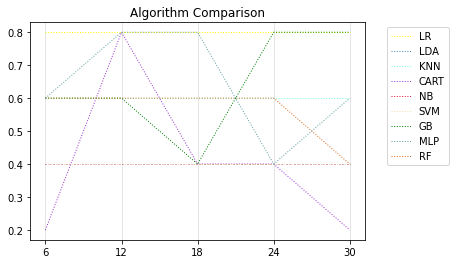

In [60]:
means=[]
for i in results:
    means.append(statistics.mean(i))
    print(i)

# x coordinates for the lines
xcoords = list(range(6,36,6)) 
f,ax = pyplot.subplots()
a = cycler('linestyle',(':',(0,(3,5,1,3,1,5)),(0,(0,5,3,5))))
b = cycler('color',['yellow',
                    'steelblue',
                    'aquamarine',
                    'darkorchid',
                    'crimson',
                    'wheat',
                    'green',
                    'cadetblue',
                    'chocolate'])
cy=a*b

ax.set_prop_cycle(cy)
pyplot.plot(numpy.arange(6,36,6),results,linewidth=1)
for i in xcoords:
    pyplot.axvline(x=i, color='k',alpha=0.1,linewidth=1)
pyplot.xticks(numpy.arange(6,36,6))
pyplot.title('Algorithm Comparison')
pyplot.legend(names[0],bbox_to_anchor=(1.05,1),loc='upper left')
pyplot.show()

In [107]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

predicted_linreg = []
predictionrange = 15
for i in range(9):
    temp=[]
    for j in range(5):
#         print(results[j][i])
        temp.append(results[j][i])
    a,b=linreg(numpy.arange(6,36,6),temp)
#     a = round(a,5)
#     b = round(b,5)
    print(a,"|",b)
    extrapolated=[round(a*index + b, 2) for index in range(predictionrange)]
#     print(len(extrapolated))
#     print((extrapolated))
    sub_linreg=[]
    for i in extrapolated:
        temp = list(str(i))
        if len(temp) > 3:
            if int(temp[2]) % 2 == 1:
                if int(temp[3]) < 5:
#                     print(round(i+0.1,1), '||CHECKED 1')
                    sub_linreg.append(round(i+0.1,1))
                else:
#                     print(round(i,1), '||CHECKED 2')
                    sub_linreg.append(round(i,1))
            else:
                if int(temp[3]) < 5:
#                     print(round(i,1),'||CHECKED 3')
                    sub_linreg.append(round(i,1))
                else:
#                     print(round(i-0.1,1), '||CHECKED 4')
                    sub_linreg.append(round(i-0.1,1))
        else:
            if (int(temp[2])) % 2 == 1:
#                 print(round(i+0.1,1),'||CHECKED 5')
                sub_linreg.append(round(i+0.1,1))
            else:
#                 print(i)
                sub_linreg.append(i)
    print(sub_linreg)
    predicted_linreg.append(sub_linreg)
    print('-'*100)
prediction=[]
for i in range(predictionrange):
    temp=[]
    for j in range(len(predicted_linreg)):
        temp.append(predicted_linreg[j][i])
    prediction.append(temp)
print("|||| PREDICTION DATASET ||||")
for i in prediction:
    print(i)

[ 6 12 18 24 30]

0.0 | 0.8
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
----------------------------------------------------------------------------------------------------
0.0 | 0.4
[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
----------------------------------------------------------------------------------------------------
0.0 | 0.6
[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
----------------------------------------------------------------------------------------------------
-0.006666666666666651 | 0.5199999999999998
[0.6, 0.6, 0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
----------------------------------------------------------------------------------------------------
0.0 | 0.4
[0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]
----------------------------------------------------------------------------------------------------
0.0 | 0.4
[0.4

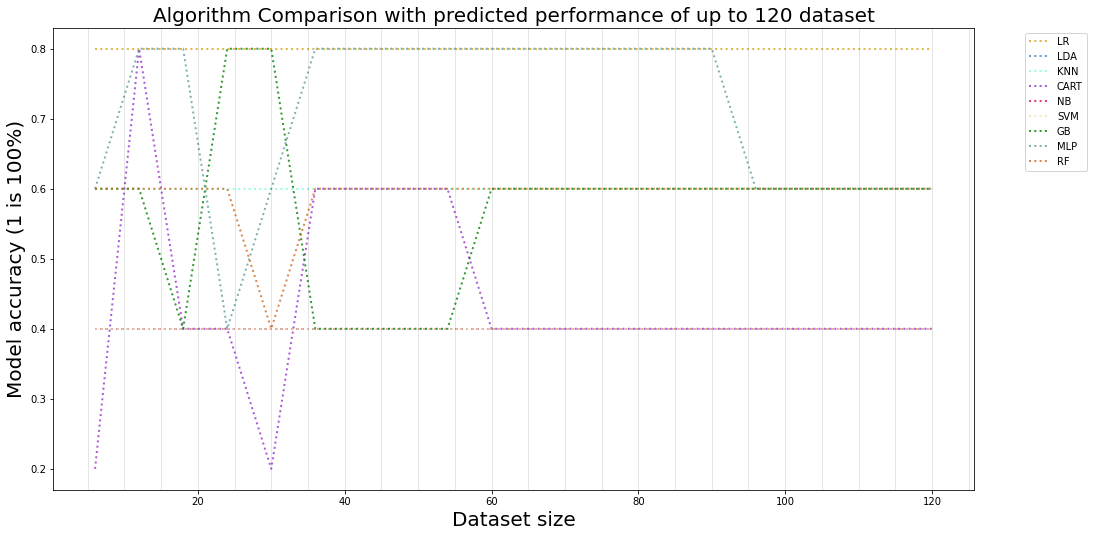

In [158]:
# x coordinates for the lines
xcoords = list(range(5,(predictionrange*6)+36,5)) 
f,ax = pyplot.subplots()
a = cycler('linestyle',(':',(0,(3,5,1,3,1,5)),(0,(0,5,3,5))))
b = cycler('color',['goldenrod',
                    'steelblue',
                    'aquamarine',
                    'darkorchid',
                    'crimson',
                    'wheat',
                    'green',
                    'cadetblue',
                    'chocolate'])
cy=a*b

plotdataset= results+prediction
ax.set_prop_cycle(cy)
pyplot.plot(numpy.arange(6,(predictionrange*6)+36,6),plotdataset,linewidth=2, alpha=0.8)
for i in xcoords:
    pyplot.axvline(x=i, color='k',alpha=0.1,linewidth=1)

# myticks = numpy.arange(6,(predictionrange*6)+36)
# print(myticks[3])
xticks = ax.xaxis.get_major_ticks()
pyplot.title('Algorithm Comparison with predicted performance of up to {a} dataset'.format(a=(predictionrange*6)+30),fontsize=20)
pyplot.legend(names[0],bbox_to_anchor=(1.05,1),loc='upper left',prop={'size': 10})
pyplot.xlabel('Dataset size',fontsize=20)
pyplot.ylabel('Model accuracy (1 is 100%)',fontsize=20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16.5, 8.5)
fig.savefig('algorithm_comparison.png', dpi=100)
pyplot.show()

In [148]:
y_validate

22    ulcerative colitis
0        Healthy control
18       Crohn's disease
27    ulcerative colitis
1        Healthy control
Name: STATUS, dtype: object

In [ ]:
print("Performance report")
print("#"*100)
model1 = SVC(class_weight='balanced', kernel='rbf')
# model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_validate)
print("Accuracy:", accuracy_score(y_validate, predictions1))
print(confusion_matrix(y_validate, predictions1))
print(classification_report(y_validate, predictions1))

In [17]:
print("Prediction Classifier v2.0")
print("#"*100)

for name, model in models:
    MODEL = model
    MODEL.fit(x_train, y_train)
    predictions1 = MODEL.predict(x_validate)
    print(name, ":", accuracy_score(y_validate, predictions1))

Prediction Classifier v2.0
####################################################################################################
LR : 0.45454545454545453
LDA : 0.6363636363636364
KNN : 0.5454545454545454
CART : 0.18181818181818182
NB : 0.6363636363636364
SVM : 0.8181818181818182
GB : 0.7272727272727273
MLP : 0.36363636363636365
RF : 0.5454545454545454


In [8]:
model1 = SVC(class_weight='balanced', kernel='rbf')
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_validate)
print(accuracy_score(y_validate, predictions1))
print(confusion_matrix(y_validate, predictions1))
print(classification_report(y_validate, predictions1))

0.8181818181818182
[[4 0 0]
 [1 1 0]
 [1 0 4]]
                    precision    recall  f1-score   support

   Crohn's disease       0.67      1.00      0.80         4
   Healthy control       1.00      0.50      0.67         2
ulcerative colitis       1.00      0.80      0.89         5

          accuracy                           0.82        11
         macro avg       0.89      0.77      0.79        11
      weighted avg       0.88      0.82      0.82        11



In [123]:
print("Logistic Regression")
print("#"*100)



model2 = LogisticRegression(max_iter=1000, class_weight='balanced')
# model2 = DecisionTreeClassifier(class_weight)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_validate)
print(accuracy_score(y_validate, predictions2))
print(confusion_matrix(y_validate, predictions2))
print(classification_report(y_validate, predictions2))

Logistic Regression
####################################################################################################
0.7272727272727273
[[2 2 0]
 [0 2 0]
 [1 0 4]]
                    precision    recall  f1-score   support

   Crohn's disease       0.67      0.50      0.57         4
   Healthy control       0.50      1.00      0.67         2
ulcerative colitis       1.00      0.80      0.89         5

          accuracy                           0.73        11
         macro avg       0.72      0.77      0.71        11
      weighted avg       0.79      0.73      0.73        11

